In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
crime = pd.read_excel('C:\\Users\\Square Bear\\Documents\\Thinkful\\Datasets\\table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

In [3]:
crime.head(10)

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN


In [4]:
crime.rename(columns = {
'Table 8':'City','Unnamed: 1':'Population','Unnamed: 2':'Violent_crime',
'Unnamed: 3':'Murder_manslaughter','Unnamed: 4':'Rape_1',
'Unnamed: 5':'Rape_2','Unnamed: 6':'Robbery', 'Unnamed: 7':'Agg_assault',
'Unnamed: 8':'Property_crime', 'Unnamed: 9':'Burglary', 'Unnamed: 10': 'Larceny_theft',
'Unnamed: 11':'Motor_theft','Unnamed: 12':'Arson'
}, inplace = True)

In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 13 columns):
City                   355 non-null object
Population             349 non-null object
Violent_crime          349 non-null object
Murder_manslaughter    349 non-null object
Rape_1                 1 non-null object
Rape_2                 350 non-null object
Robbery                349 non-null object
Agg_assault            349 non-null object
Property_crime         349 non-null object
Burglary               349 non-null object
Larceny_theft          349 non-null object
Motor_theft            349 non-null object
Arson                  188 non-null object
dtypes: object(13)
memory usage: 36.1+ KB


In [9]:
crime['Population'] = pd.to_numeric(crime['Population'], errors='coerce')
crime['Violent_crime'] = pd.to_numeric(crime['Violent_crime'], errors='coerce')
crime['Murder_manslaughter'] = pd.to_numeric(crime['Murder_manslaughter'], errors='coerce')
crime['Rape_2'] = pd.to_numeric(crime['Rape_2'], errors='coerce')
crime['Robbery'] = pd.to_numeric(crime['Robbery'], errors='coerce')
crime['Agg_assault'] = pd.to_numeric(crime['Agg_assault'], errors='coerce')
crime['Property_crime'] = pd.to_numeric(crime['Property_crime'], errors='coerce')
crime['Burglary'] = pd.to_numeric(crime['Burglary'], errors='coerce')
crime['Larceny_theft'] = pd.to_numeric(crime['Larceny_theft'], errors='coerce')
crime['Motor_theft'] = pd.to_numeric(crime['Motor_theft'], errors='coerce')
crime['Arson'] = pd.to_numeric(crime['Arson'], errors='coerce')


#data["Year"] = pd.to_numeric(data["Year"],errors='coerce')

In [10]:
# this will take care of all the int or float columns
crime = crime.fillna(crime.mean()) 

# This takes care of the Nan in the columns
#crime['Population'] = crime['Population'].fillna(crime['Population'].mean()[0])
#crime['Violent_crime'] = crime['Violent_crime'].fillna(crime['Violent_crime'].mean()[0])
#crime['Murder_manslaughter'] = crime['Murder_manslaughter'].fillna(crime['Murder_manslaughter'].mean()[0])
#crime['Rape_2'] = crime['Rape_2'].fillna(crime['Rape_2'].mean()[0])
#crime['Robbery'] = crime['Robbery'].fillna(crime['Robbery'].mode()[0])
#crime['Agg_assault'] = crime['Agg_assault'].fillna(crime['Agg_assault'].mode()[0])
#crime['Property_crime'] = crime['Property_crime'].fillna(crime['Property_crime'].mode()[0])
#crime['Burglary'] = crime['Burglary'].fillna(crime['Burglary'].mode()[0])
#crime['Larceny_theft'] = crime['Larceny_theft'].fillna(crime['Larceny_theft'].mode()[0])
#crime['Motor_theft'] = crime['Motor_theft'].fillna(crime['Motor_theft'].mode()[0])
#crime['Arson'] = crime['Arson'].fillna(crime['Arson'].mode()[0])


In [11]:
#Remove column because there are no values in column
crime = crime.drop(['Rape_1'], axis=1)

crime.head()

,City,Population,Violent_crime,Murder_manslaughter,Rape_2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson
0,NEW YORK,40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
1,Offenses Known to Law Enforcement,40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
2,"by City, 2013",40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
3,City,40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
4,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000


In [12]:
#crime.head()
crime.drop(crime.index[0:4]) #,'Offenses Known to Law Enforcement','by City, 2013','City'])

#crime.drop(crime.head(4).index, inplace=True)

,City,Population,Violent_crime,Murder_manslaughter,Rape_2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson
4,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
5,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
6,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
7,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,1.872
8,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,1.872
9,Alfred Village,4089.000,5.000,0.000,0.000,3.000,2.000,46.000,10.000,36.000,0.000,1.872
10,Allegany Village,1781.000,3.000,0.000,0.000,0.000,3.000,10.000,0.000,10.000,0.000,0.000
11,Amherst Town,118296.000,107.000,1.000,7.000,31.000,68.000,2118.000,204.000,1882.000,32.000,3.000
12,Amityville Village,9519.000,9.000,0.000,2.000,4.000,3.000,210.000,16.000,188.000,6.000,1.000
13,Amsterdam,18182.000,30.000,0.000,0.000,12.000,18.000,405.000,99.000,291.000,15.000,0.000


In [13]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 12 columns):
City                   355 non-null object
Population             355 non-null float64
Violent_crime          355 non-null float64
Murder_manslaughter    355 non-null float64
Rape_2                 355 non-null float64
Robbery                355 non-null float64
Agg_assault            355 non-null float64
Property_crime         355 non-null float64
Burglary               355 non-null float64
Larceny_theft          355 non-null float64
Motor_theft            355 non-null float64
Arson                  355 non-null float64
dtypes: float64(11), object(1)
memory usage: 33.4+ KB


In [14]:
crime.isna().sum()

City                   0
Population             0
Violent_crime          0
Murder_manslaughter    0
Rape_2                 0
Robbery                0
Agg_assault            0
Property_crime         0
Burglary               0
Larceny_theft          0
Motor_theft            0
Arson                  0
dtype: int64

In [15]:
crime.head()

,City,Population,Violent_crime,Murder_manslaughter,Rape_2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson
0,NEW YORK,40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
1,Offenses Known to Law Enforcement,40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
2,"by City, 2013",40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
3,City,40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
4,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000


In [20]:
crime.describe()

,Population,Violent_crime,Murder_manslaughter,Rape_2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson,Population_2
count,355.000,355.000,355.000,355.000,355.000,355.000,355.000,355.000,355.000,355.000,355.000,355.000
mean,40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872,199572505966.474
std,445565.629,2787.295,18.122,59.825,1020.788,1689.179,7583.615,915.758,6282.998,399.415,7.751,3741432884103.085
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,276676.000
25%,3024.000,2.000,0.000,0.000,0.000,1.000,41.000,6.000,31.000,0.000,0.000,9144720.000
50%,7473.000,6.000,0.000,0.000,1.000,5.000,114.000,18.000,96.000,2.000,1.872,55845729.000
75%,19673.000,23.000,0.000,2.000,5.000,15.000,346.000,53.500,300.000,8.000,1.872,387026930.000
max,8396126.000,52384.000,335.000,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000,70494931807876.000


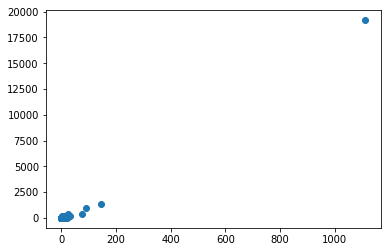

In [16]:
x = crime['Rape_2'].values.reshape(-1, 1)
y = crime['Robbery']

plt.scatter(x, y)

Coefficients: 
 [16.98504972]
Intercept: 
 -26.714041626103864


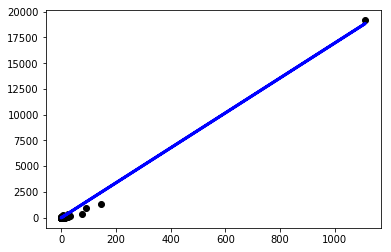

In [17]:
# Instantiate our model.
regr = linear_model.LinearRegression()


# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

In [18]:
crime['Population_2'] = crime['Population'] * crime['Population']

NameError: name 'preprocessing' is not defined